In [1]:
!pip install translate

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Adidasdataset_cleaned.csv')
data.head()

,created_at,username,full_text,cleaning,case_folding,tokenize,StopWord Removal,stemming_data,normalized_text
0,Fri Sep 29 21:25:46 +0000 2023,alpha1906,@ComplexSneakers Nike is trash. Adidas is my g...,Nike is trash Adidas is my go to favoriteEXCE...,nike is trash adidas is my go to favoriteexce...,"['nike', 'is', 'trash', 'adidas', 'is', 'my', ...","['nike', 'trash', 'adidas', 'go', 'favoriteexc...",nike trash adidas go favoriteexceptfor nike wr...,nike trash adidas go favoriteexceptfor nike wr...
1,Fri Sep 29 17:05:47 +0000 2023,ElkCitySptswear,Does your team new a new look this season? Tak...,Does your team new a new look this season Take...,does your team new a new look this season take...,"['does', 'your', 'team', 'new', 'a', 'new', 'l...","['team', 'new', 'new', 'look', 'season', 'take...",team new new look season take advantage adidas...,team new new look season take advantage adidas...
2,Fri Sep 29 14:18:11 +0000 2023,BeardedMangus,@getsit Some of my favorite breakfast shoes ha...,Some of my favorite breakfast shoes have been...,some of my favorite breakfast shoes have been...,"['some', 'of', 'my', 'favorite', 'breakfast', ...","['favorite', 'breakfast', 'shoes', 'adidas', '...",favorite breakfast shoes adidas derrick rose m...,favorite breakfast shoes adidas derrick rose m...
3,Fri Sep 29 07:33:35 +0000 2023,TheJoelParadox,A deal for the Ladies if you're a Suns fan. Ad...,A deal for the Ladies if youre a Suns fan Adid...,a deal for the ladies if youre a suns fan adid...,"['a', 'deal', 'for', 'the', 'ladies', 'if', 'y...","['deal', 'ladies', 'youre', 'suns', 'fan', 'ad...",deal ladies youre suns fan adidas nmd r impact...,deal ladies youre suns fan adidas nmd r impact...
4,Fri Sep 29 04:15:11 +0000 2023,KicksDeals,Select sizes are available for the cream/carbo...,Select sizes are available for the creamcarbon...,select sizes are available for the creamcarbon...,"['select', 'sizes', 'are', 'available', 'for',...","['select', 'sizes', 'available', 'creamcarbong...",select sizes available creamcarbongrey adidas ...,select sizes available creamcarbongrey adidas ...


In [9]:
#from translate import Translator

#def convert_eng(tweet):
   # translator=Translator(to_lang="en", from_lang="id")
    #translation=translator.translate(tweet)
    #return translation

#data['tweet_english']=data['normalized_text'].apply(convert_eng)

ConnectionError: HTTPConnectionPool(host='api.mymemory.translated.net', port=80): Max retries exceeded with url: /get?q=nike+trash+adidas+go+favoriteexceptfor+nike+wrestling+joints+copped+pandemic+damn+things+comfortable+hell&langpair=id%7Cen (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x00000228140C1BE0>: Failed to resolve 'api.mymemory.translated.net' ([Errno 11001] getaddrinfo failed)"))

In [3]:
#DATA PREPROCESSING
data= pd.DataFrame(data[['normalized_text']])
data.head(5)

,normalized_text
0,nike trash adidas go favoriteexceptfor nike wr...
1,team new new look season take advantage adidas...
2,favorite breakfast shoes adidas derrick rose m...
3,deal ladies youre suns fan adidas nmd r impact...
4,select sizes available creamcarbongrey adidas ...


In [13]:
data.to_csv('Adidasdataset_cleaned2.csv')
data=pd.read_csv('Adidasdataset_cleaned2.csv')
data= pd.DataFrame(data[['normalized_text']])
data.head()

,normalized_text
0,nike trash adidas go favoriteexceptfor nike wr...
1,team new new look season take advantage adidas...
2,favorite breakfast shoes adidas derrick rose m...
3,deal ladies youre suns fan adidas nmd r impact...
4,select sizes available creamcarbongrey adidas ...


In [14]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

# CLASSIFICATION USING TEXT BLOB

In [6]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
data_tweet=list(data['normalized_text'])
polarities=0

status=[]
total_positive=total_negative=total_neutral=total=0

for i, tweet in enumerate(data_tweet):
    analysis=TextBlob(tweet)
    polarities+=analysis.polarity

    if analysis.sentiment.polarity>0.0:
        total_positive+=1
        status.append('Positive')
    elif analysis.sentiment.polarity==0.0:
        total_neutral+=1
        status.append('Neutral')
    else:
        total_negative+=1
        status.append('Negative')

    total+=1

print(f'Data Analysis:\nPositive={total_positive}\nNeutral={total_neutral}\nNegative={total_negative}')
print(f'\nTotal Data: {total}')

Data Analysis:
Positive=12411
Neutral=4944
Negative=2454

Total Data: 19809


In [15]:
data['Classification']=status
data

,normalized_text,Classification
0,nike trash adidas go favoriteexceptfor nike wr...,Positive
1,team new new look season take advantage adidas...,Positive
2,favorite breakfast shoes adidas derrick rose m...,Positive
3,deal ladies youre suns fan adidas nmd r impact...,Positive
4,select sizes available creamcarbongrey adidas ...,Positive
...,...,...
19804,adidas got better signature basketball shoes h...,Positive
19805,adidas great job james harden anthony edwards ...,Positive
19806,see korn adidas shoes,Neutral
19807,amp thought making limited number different pe...,Negative


# VISUALIZATION

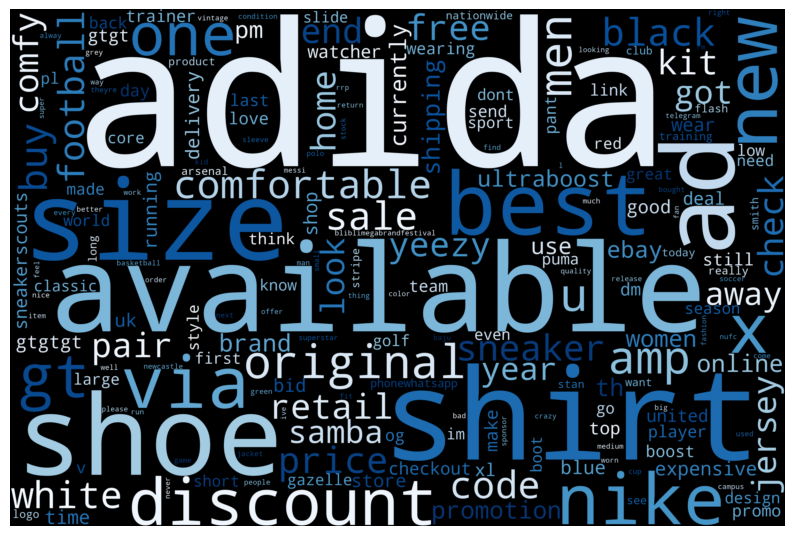

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordclud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words=' '.join([tweets for tweets in data['normalized_text']])

wordcloud=WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)
plot_cloud(wordcloud)

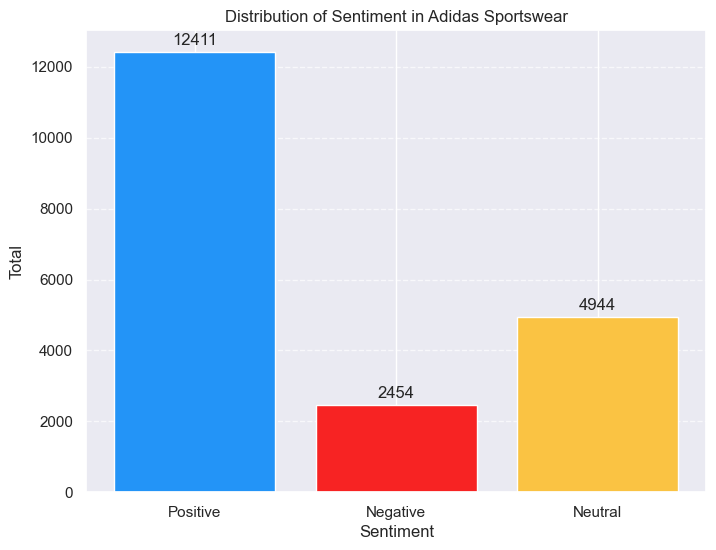

In [17]:
import seaborn as sns

sns.set_theme()

labels=['Positive','Negative','Neutral']
counts=[total_positive, total_negative, total_neutral]

def show_bar_chart(labels, counts, title):
    fig, ax=plt.subplots(figsize=(8,6))
    bars=ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

    for bar,count in zip(bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Total')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels,counts, "Distribution of Sentiment in Adidas Sportswear")

# CLASSIFICATION USING NAIVE BAYES

In [18]:
data

,normalized_text,Classification
0,nike trash adidas go favoriteexceptfor nike wr...,Positive
1,team new new look season take advantage adidas...,Positive
2,favorite breakfast shoes adidas derrick rose m...,Positive
3,deal ladies youre suns fan adidas nmd r impact...,Positive
4,select sizes available creamcarbongrey adidas ...,Positive
...,...,...
19804,adidas got better signature basketball shoes h...,Positive
19805,adidas great job james harden anthony edwards ...,Positive
19806,see korn adidas shoes,Neutral
19807,amp thought making limited number different pe...,Negative


In [19]:
#dataset=data.drop([''],axis=1, inplace=False)
dataset=[tuple(x) for x in data.to_records(index=False)]

In [27]:
import random

set_positive=[]
set_negative=[]
set_neutral=[]

for n in dataset:
    if(n[1]=='Positive'):
        set_positive.append(n)
    elif(n[1]=='Negative'):
        set_negative.append(n)
    else:
        set_neutral.append(n)

set_positive=random.sample(set_positive, k=int(len(set_positive)/2))
set_negative=random.sample(set_negative, k=int(len(set_negative)/2))
set_neutral=random.sample(set_neutral, k=int(len(set_neutral)/2))

train=set_positive+set_negative+set_neutral

train_set=[]

for n in train:
    train_set.append(n)

In [21]:
from textblob.classifiers import NaiveBayesClassifier
cl=NaiveBayesClassifier(train_set)
print("Accuracy Test: ",cl.accuracy(dataset))


Accuracy Test:  0.8522388813165733


In [26]:
#Labeling
data_tweet=list(data['normalized_text'])
polarities=0

status=[]
total_positive=total_negative=total_neutral=total=0

for i,tweet in enumerate(data_tweet):
    analysis=TextBlob(tweet,classifier=cl)

    if analysis.classify()=='Positive':
        total_positive+=1
    elif analysis.classify()=='Neutral':
        total_neutral+=1
    else:
        total_negative+=1

    status.append(analysis.classify())
    total+=1

print(f'\nAnalysis Data:\nPositive={total_positive}\nNeutral={total_neutral}\nNegative={total_negative}')
print(f'\nTotal Data:{total}')


Analysis Data:
Positive=13625
Neutral=4717
Negative=1467

Total Data:19809


In [31]:
status= pd.DataFrame({"NaiveBayes": status})
data['NaiveBayes_classification']=status

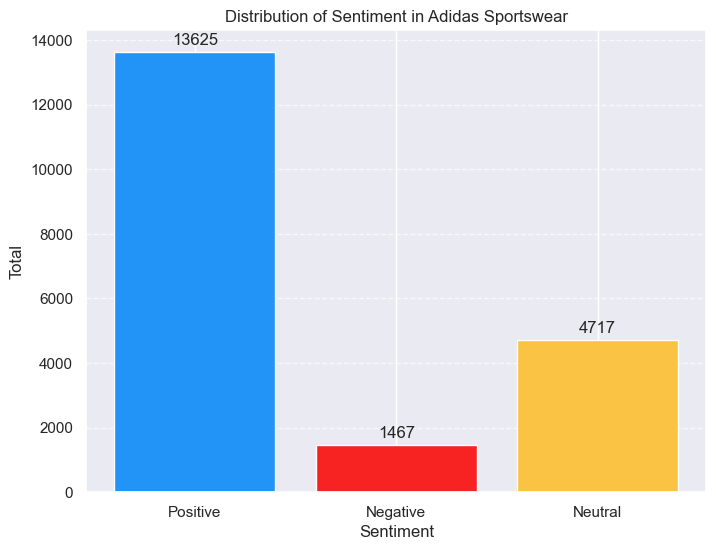

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels=['Positive','Negative','Neutral']
counts=[total_positive, total_negative, total_neutral]

def show_bar_chart(labels, counts, title):
    fig, ax=plt.subplots(figsize=(8,6))
    bars=ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

    for bar,count in zip(bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Total')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels,counts, "Distribution of Sentiment in Adidas Sportswear")

In [34]:
data

,normalized_text,Classification,NaiveBayes_classification
0,nike trash adidas go favoriteexceptfor nike wr...,Positive,Positive
1,team new new look season take advantage adidas...,Positive,Positive
2,favorite breakfast shoes adidas derrick rose m...,Positive,Positive
3,deal ladies youre suns fan adidas nmd r impact...,Positive,Positive
4,select sizes available creamcarbongrey adidas ...,Positive,Positive
...,...,...,...
19804,adidas got better signature basketball shoes h...,Positive,Positive
19805,adidas great job james harden anthony edwards ...,Positive,Positive
19806,see korn adidas shoes,Neutral,Neutral
19807,amp thought making limited number different pe...,Negative,Negative


In [36]:
data_eval=[tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n)>=4:
        if n[2]!=n[3]:
            print(f'Text:{n[0]}\nClassifier:{n[2]}\nClassifier Bayes: {n[3]}\n')
        else:
            print("Tuples don't have enough elements.")